Original length of sample data is 4561
110 tests with Result, IPAddress, TotalScore = NaN dropped
Extra ip address dropped in 36 tests


<IPython.core.display.Javascript object>


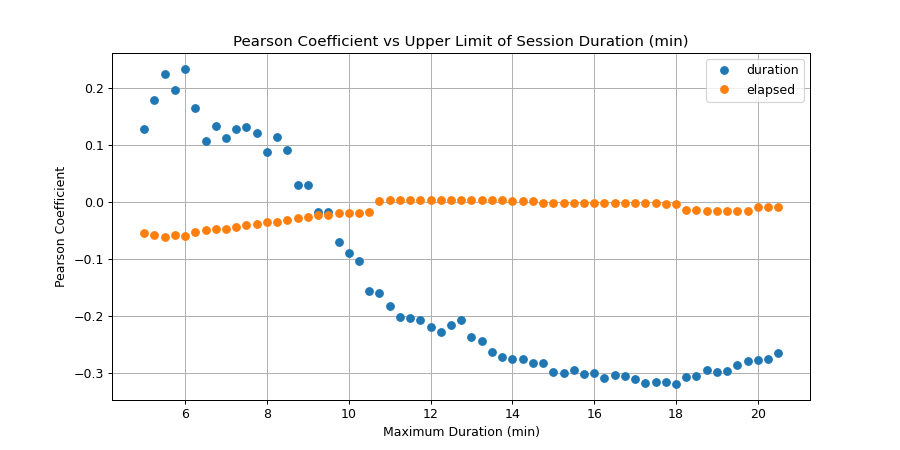

In [1]:
%matplotlib notebook
# Pearson_by_limit: Pearson correlations for range of test durations.
# Compares a list of durations so duration and elapsed can be compared.
# duration is time given to the time it takes to do a test by database.
# elapsed is the time form the start to the end of the test.
# Graphs show that % passing scores is higher when test duration is shorter.
# The pearson correlation is calculated for ranges of test duration decreased
# from full range to just 5 min.

import mplcursors
import dmv_test_input as dti
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# -----------------------------------------------------------------------
class Pearson_by_limit():

    def duration(self, lo=5., hi=100., inc=5.):
        return np.arange(lo, hi+0.01*(hi-lo)/inc, inc)

    def __init__(self, df, fields, lo=5., hi=100., inc=5.):
        self.df = df
        self.limits = self.duration(lo=lo, hi=hi, inc=inc)

    def pearson(self, fields):
        self.correlations = {}
        for field in fields:
            
            self.correlation = {}

            for limit in self.limits:
                self.short = self.df[self.df.duration <= limit]
                try:
                    self.correlation[limit] = pearsonr(self.short["TotalScore"], self.short[field])[0]
                except:
                    self.correlation[limit] = 0
                    
            self.correlations[field] = self.correlation
            
        return self.correlations

# -----------------------------------------------------------------------
def plot_pearson(df, fields):
    fig, ax = plt.subplots(figsize=(10, 5))
    for field in fields:
        plt.plot(df.limits, df.correlations[field].values(), "o", label=field)
    mplcursors.cursor(hover=True)
    ax.set_title(f"Pearson Coefficient vs Upper Limit of Session Duration (min)")
    ax.set_xlabel(f"Maximum Duration (min)")
    ax.set_ylabel(f"Pearson Coefficient")
    ax.legend()
    plt.grid(visible=True)
    plt.show()

# -----------------------------------------------------------------------
def main():

    df = dti.read_dmv_log(case=1)
    # Add column to evaluate difference between start and end time
    df["elapsed"]    = abs(df['TestEndDateTime'] - df['TestStartDateTime']).dt.total_seconds()/60.
    df["difference"] = (df.elapsed - df.duration)

    pearson = Pearson_by_limit(df, ["duration", "elapsed"], lo=5., hi=20., inc=0.25)
    correlations = pearson.pearson(["duration", "elapsed"])
    plot_pearson(pearson, ["duration", "elapsed"])
    return df, pearson

df, pearson = main()
